In [ ]:
import requests
from ao3 import AO3
api = AO3()

work = api.work(id='58203763')
print(work.title)


# USERNAME = "Aas_hat"
# PASSWORD = "Ajunu021097%"

# html = []
# login_url = 'https://archiveofourown.org/users/login'
# data = {
# 'user[login]': USERNAME,
# 'user[password]': PASSWORD,
# 'user[remember_me]': '1',
# 'commit': "Log+in"
# }
# s = requests.Session()
# response = s.post(login_url, data)
# while(response.text=="Retry later\n"):
#     response = s.post(login_url, data)
#     site = s.get("https://archiveofourown.org")
#     soup = BS(site.content, 'html.parser')
#     data["authenticity_token"] = soup.find("input", {""name": "authenticity_token"})['value']
#     response = s.post(login_url, data) 

In [ ]:
from bs4 import BeautifulSoup as BS
import requests
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
import string



punctuation='!"#$%&\'()*+,-–—./:;<=>?@[\\]^_`{|}~’‘”“…\n\xa0'
letters="abcdefghijklmnopqrstuvwxyzéà0123456789éàüä"
letterTTable = dict.fromkeys(map(ord, letters), None)
puncTTable = dict.fromkeys(map(ord, punctuation), " ")
site = "https://archiveofourown.org"

#put the suffix of the fic here
ficLink = "/works/56064253/chapters/142397071"
Fic = requests.get(site+ficLink)
soup = BS(Fic.text, "html.parser")

class fic:
    def __init__(self,ficLink):
        soup = BS(requests.get("https://archiveofourown.org"+ficLink).text, "html.parser")

        #titles and authors
        self.title = soup.find('h2').text.replace("\n",'').strip()
        self.author= soup.find('h3',attrs={"class":"byline heading"}).text.replace("\n",'').split(',')

        '''metadata'''
        #rating
        self.rating = soup.find('dd',attrs={"class":"rating tags"}).text.replace("\n","")

        #warnings
        self.warnings=[]
        for i in soup.find('dd',attrs={"class":"warning tags"}).findAll('li'):
            self.warnings.append(i.text)
            
        #category
        self.categories=[]
        try:
            for i in soup.find('dd',attrs={"class":"category tags"}).findAll('li'):
                self.categories.append(i.text)
        except AttributeError:
            pass

        #fandom
        self.fandom=[]
        for i in soup.find('dd',attrs={"class":"fandom tags"}).findAll('li'):
            self.fandom.append(i.text)  

        #relationships
        self.relationships=[]
        try:
            for i in soup.find('dd',attrs={"class":"relationships tags"}).findAll('li'):
                self.relationships.append(i.text)
        except AttributeError:
            pass

        #characters
        self.characters=[]
        try:
            for i in soup.find('dd',attrs={"class":"character tags"}).findAll('li'):
                self.characters.append(i.text)
        except AttributeError:
            pass

        #additional tags
        self.additional_tags=[]
        try:
            for i in soup.find('dd',attrs={"class":"freeform tags"}).findAll('li'):
                self.additional_tags.append(i.text)
        except AttributeError:
            pass

        #language
        self.language=soup.find('dd',attrs={"class":"language"}).text

        '''stats'''
        #publish date
        self.publish_date = soup.find('dd',attrs={"class":"published"}).text
        

        #last updated
        try:
            self.last_update = soup.find('dd',attrs={"class":"status"}).text
            
        except AttributeError:
            self.last_update=None
    
        #words
        words = soup.find('dd',attrs={"class":"words"})
        self.words = int(words.text.replace(',',''))
           
        #chapter count
        chapters = soup.find('dd',attrs={"class":"chapters"})
        self.chapters = int(chapters.text.split('/')[0].replace(',',''))
        
        #comments
        try:
            comments = soup.find('dd',attrs={"class":"comments"})
            self.comments = int(comments.text.replace(',',''))
        except AttributeError:
            self.comments=None
    
        #kudos
        try:
            self.kudos = soup.find('dd',attrs={"class":"kudos"}).text
        except ValueError:
            self.kudos = int(soup.find('dd',attrs={"class":"kudos"}).text.replace(',',''))
        except AttributeError:
            self.kudos=None       
    
        #bookmarks
        try:    
            self.bookmarks = int(soup.find('dd',attrs={"class":"bookmarks"}).text.replace(',',''))
        except AttributeError:
            self.bookmarks=None
            
        #hits
        self.hits = int(soup.find('dd',attrs={"class":"hits"}).text.replace(',',''))
        

#traversing through the chapters
def findNext(ficLink):
    for i in soup.findAll('a'):
        if "Next Chapter →" in i:
            return i.get('href')



def chapterWords():
    chapter = soup.find('div',attrs={"class":"userstuff module"})
    output = chapter.text 
    output = output.lower()
    #getting rid of punctuations
    for c in punctuation:
        output = output.replace(c," ")
    output = output.replace("\n",'')

    return (len(output.split())-2) #because the find function takes 2 extra words

def WordFreq(ficLink):
    Fic = requests.get(site+ficLink)
    soup = BS(Fic.text, "html.parser")
    freq={}
    print("1")
    while findNext(soup) != None:
        print("2")
        Fic = requests.get(site+ficLink)
        soup = BS(Fic.text, "html.parser")
        chapter = soup.find('div',attrs={"class":"userstuff module"})
        output = chapter.text
        output = output.lower()
        output = output.translate(puncTTable)
        for i in output.split():
            if i in freq:
                freq[i]+=1
            else:
                freq[i]=1
        ficLink = findNext(soup)
    del freq["chapter"]
    del freq["text"]
    return freq
    

def PunctuationFrequency():
    chapter = soup.find('div',attrs={"class":"userstuff module"})
    output = chapter.text
    output = output.lower()
    output = output.translate(letterTTable)
    for c in punctuation:
        output = output.replace(c,f"{c} ")
    return output.split()

def graphBar(dic,title,xLab,counts):
    
    plt.bar(x=dic.keys(),height=dic.values(),color="#12ACAE")
    plt.title(title)
    plt.xlabel(xLab)
    plt.ylabel("Frequency")
    plt.savefig(f"{title.split()[:4]}_{len(counts)}.png")
    plt.show()


if __name__ == "__main__":
    counts=[]
    puncs={}


    title= soup.find('h2').text.replace("\n",'').strip()

    while findNext(ficLink) != None:
        Fic = requests.get(site+ficLink)
        soup = BS(Fic.text, "html.parser")
        for i in PunctuationFrequency():
            if i in puncs:
                puncs[i]+=1
            else:
                puncs[i]=1
            print(puncs)
        #counts.append(chapterWords())
        ficLink = findNext(ficLink)

 #–-


    plt.style.use('classic')
    plt.rcParams["figure.dpi"] = 150
    plt.tight_layout(pad=2.5)
    plt.plot([i for i in range(1,len(counts)+1)],counts, color="#12ACAE")
    # graphBar(puncs, f"{title}", "Punctuation", counts)
    plt.xlim(1, len(counts)+1)
    plt.ylim(0, max(counts)+2000)
    plt.title(title)
    
    plt.xlabel('Chapter')
    plt.ylabel('Words')
    plt.grid()
    plt.savefig(f"{title}_{len(counts)}.png")

    plt.show()

KeyboardInterrupt: 

1


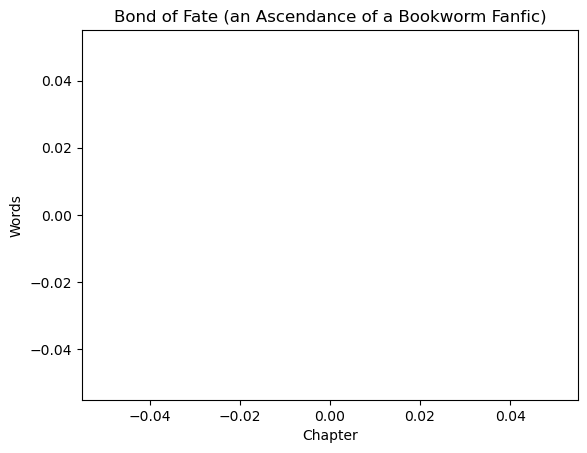

In [2]:
from bs4 import BeautifulSoup as BS
import requests
import matplotlib.pyplot as plt
import string


site = "https://archiveofourown.org"

#put the suffix of the fic here
fic = "/works/56064253/chapters/142397071"


#traversing through the chapters
def findNext():
    for i in soup.findAll('a'):
        if "Next Chapter →" in i:
            return i.get('href')



def getWords():
    chapter = soup.find('div',attrs={"class":"userstuff module"})
    if chapter == None:
        return 0
    output = chapter.text   #making changes to chapter.text itself doesn't work well 

    #getting rid of punctuations
    for c in string.punctuation:
        output = output.replace(c," ")
        
    output = output.replace("\n",'')
    output = output.replace("’",'')
    output = output.replace("‘",'')
    output = output.replace("”",'')
    output = output.replace("“",'')

    return (len(output.split())-2) #because the find function takes 2 extra words


counts=[]
Fic = requests.get(site+fic)
soup = BS(Fic.text, "html.parser")
title= soup.find('h2').text.replace("\n",'').strip()

count = 0
while findNext() != None:
    count += 1
    print(count)
    Fic = requests.get(site+fic)
    soup = BS(Fic.text, "html.parser")
    counts.append(getWords())
    fic = findNext()

plt.plot(counts)
plt.title(title)
plt.xlabel('Chapter')
plt.ylabel('Words')

plt.show()

In [ ]:
import sys

target = 10610209857723
def recursion(input1, input2, counter):
    counter += 1
    if (input1 == target):
        return counter
    else:
        print("Value: " + str(input2)+" Counter value: "+ str(counter))
        return recursion(input2, input1+input2, counter)
    
recursion(0,1,0)

In [26]:
def findMedianSortedArrays(nums1, nums2) -> float:
    import math
    counter1 = 0
    counter2 = 0
    finalnums = []
    while True:
        if(counter1>=len(nums1)):
            finalnums += nums2[counter2:]

            break
        elif(counter2>=len(nums2)):
            finalnums += nums1[counter1:]
    
            break
        
        finalnums.append(min(nums1[counter1],nums2[counter2]))
        if(nums1[counter1]<nums2[counter2]):
            counter1 += 1
        else:
            counter2 += 1
    if(len(finalnums) % 2 == 0):
        index = len(finalnums)/2
        index = int(index)
        val1 = finalnums[index]
        print(val1)
        val2 = finalnums[index+1]
        print(val2)
        return (val1+val2)/2
    else:
        index = len(finalnums)/2
        index = math.ceil(index)
        index = int(index)
        return(finalnums[index])

print(findMedianSortedArrays([1,3],[2,4]))

3
4
3.5


In [48]:
"""
flag for +-
"""
def myAtoi(s):
    finalString = ""
    flagSign = True
    flagWhitespace = True
    flag0 = True
    for i in range(len(s)):
        #Whitespace Checker
        if(s[i] == ' '):
            if(flagWhitespace == True):
                continue
            else:
                break
        else:
            flagWhitespace = False
        
        #Sign Checker
        if(s[i] == '+' or s[i] == '-'):
            if(flagSign == True):
                if(s[i] == "-"):
                    finalString += "-"
                flagSign = False
                
                continue
            else:
                break       
        
        #Zero Checker
        if(s[i] == '0'):
            if(flag0 == True):
                flagSign = False
                flagWhitespace = False
                continue
        flag0 = False

        #Character Checker
        try:
            flag0 = False
            flagSign = False
            flagWhitespace = False
            finalString = finalString + str(int(s[i]))
        except:
            break;   
    if(finalString == "" or finalString == "-"):
        return 0
    return(int(finalString))

print(myAtoi("0-1"))


-1


In [54]:
def isPalindrome(x):
    y = str(x)
    return (y == y[::-1])

print(isPalindrome(11))

True


In [66]:
import math
def intToRoman(num):
    finalString = ""
    while (num != 0):
        if (num // 1000 != 0):
            numb = num//1000
            finalString += "".join(["M"]*numb)
            num -= 1000*numb 
        if (num // 100 != 0):
            if (num >= 900):
                finalString += "CM"
                num -= 900
            elif (num >= 500):
                finalString += "D"
                num -= 500
            elif (num >= 400):
                finalString += "CD"
                num -= 400
            if (num >= 100):
                numb = num//100
                finalString += "".join(["C"]*numb)
                num -= 100*numb
        if (num // 10 != 0):
            if(num >= 90):
                finalString += "XC"
                num -= 90
            elif(num >= 50):
                finalString += "L"
                num -= 50
            if (num >= 40):
                finalString += "XL"
                num -= 40
            else:
                numb = num//10
                finalString += "".join(["X"]*numb)
                num -= 10*numb
        if (num % 10 == 9):
            finalString += "IX"
            num -= 9
        elif(num % 10 >= 5):
            finalString += "V"
            num -= 5
        elif(num % 10 == 4):
            finalString += "IV"
            num -= 4
        elif(num % 10 < 4):
            finalString += "".join(["I"]*num)
            num = 0
    return finalString

print(intToRoman(1994))


MCMXCIV


In [1]:
import numpy as np
def mergeSort(arr):
    if (arr == []):
        return []
    if(len(arr) <= 1):
        return arr
    else:
        arrList = np.array_split(arr,2)
        arr1 = mergeSort(arrList[0].tolist())
        arr2 = mergeSort(arrList[1].tolist())
        returnArray = []
        arr1counter = 0
        arr2counter = 0
        if(arr1 == []):
            return arr2
        elif(arr2 == []):
            return arr1
        while True:

            if(arr1counter == len(arr1) and arr2counter == len(arr2)):
                break

            if(arr1counter == len(arr1)):
                returnArray.append(arr2[arr2counter::])
                arr2counter = len(arr2)
            if(arr1counter == len(arr2)):
                returnArray.append(arr1[arr1counter::])
                arr1counter = len(arr1)
                
            if(arr1[arr1counter] < arr2[arr2counter]):
                returnArray.append(arr1[arr1counter])
                arr1counter += 1
            else:
                returnArray.append(arr2[arr2counter])
                arr2counter += 1
            
        return returnArray
    
print(mergeSort([6,5,4,3,2,1]))
            

IndexError: list index out of range

In [2]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    # Divide the array into two halves
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    # Merge the sorted halves
    return merge(left_half, right_half)


def merge(left, right):
    sorted_arr = []
    i = j = 0

    # Compare elements and merge
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_arr.append(left[i])
            i += 1
        else:
            sorted_arr.append(right[j])
            j += 1

    # Append any remaining elements
    sorted_arr.extend(left[i:])
    sorted_arr.extend(right[j:])

    return sorted_arr

# Example usage
if __name__ == "__main__":
    arr = [38, 27, 43, 3, 9, 82, 10]
    sorted_arr = merge_sort(arr)
    print("Sorted array:", sorted_arr)


Sorted array: [3, 9, 10, 27, 38, 43, 82]


In [21]:
import random
import time
arr = []
for i in range(0,99999):
    arr.append(random.randint(1,9999))

In [46]:
import random

def mergeSort(arr):
    if(len(arr) <= 1):
        return arr
    
    mid = len(arr) // 2
    arr1 = mergeSort(arr[:mid])
    arr2 = mergeSort(arr[mid:])
    
    return merge(arr1,arr2)

def merge(arr1,arr2):
    left = 0
    right = 0
    finalArr = []
    while (left < len(arr1) and right < len(arr2)):
        if(arr1[left] < arr2[right]):
            finalArr.append(arr1[left])
            left += 1
        else:
            finalArr.append(arr2[right])
            right += 1
    
    finalArr.extend(arr1[left:])
    finalArr.extend(arr2[right:])
    return finalArr

random.seed(10)



timeArr = []
for i in range (50):
    start_time = time.time()
    mergeSort(arr)
    end_time = time.time()
    timeArr = timeArr + [(end_time-start_time)]
print(sum(timeArr)/len(timeArr))

0.2045177412033081


In [45]:
def quickSort(arr):
    if(arr == []):
        return []
    if(len(arr) <= 1):
        return arr
    
    pivot =  len(arr) // 2
    left = []
    right = []

    for i in range(len(arr)):
        if(i == pivot):
            continue
        if(arr[i] < arr[pivot]):
            left.append(arr[i])
        else:
            right.append(arr[i])
    
    left = quickSort(left)
    right = quickSort(right)

    

    return left+[arr[pivot]]+right

# arr = [0,9,8,7,6,5,4,3,2,1,123]
timeArr = []
for i in range (50):
    start_time = time.time()
    quickSort(arr)
    end_time = time.time()
    timeArr = timeArr + [(end_time-start_time)]
print(sum(timeArr)/len(timeArr))

0.18275373935699463


In [5]:
arr1 = ["Erwin", "Marcel", "Luis"," Heiner", "Oliver"," Erik", "Agnus", "Luka"," Fritz", "Swen"," Ole"," Pat"," Klaus", "Mart",' Liam', "Paul", "Willi"," Dom",' Finn'," Leon", "Casp"," Flo","Stef", "Mats", "Hans"," Tobias"," Felix"]
arr2 = ["Anni", "Milli"," Ria"," Manda"," Malia"," Steffa"," Mara"," Elea",' Mina', "Lotta","Rosi", "Lina", "Tina"," Lidi"," Tessa"," Ola"," Rosa"," Thea", "Bella",' Edith', "Enna", "Leoni", "Doris", "Nicole"," Emmy"," Fina",' Marle', ]

arr3 = []
flag = True
counter1 = 0
counter2 = 0
while True:
    if (flag == True):
        arr3.append(arr1[counter1])
        counter1 += 1
        if(counter1 == len(arr1)):
            arr3.extend(arr2[counter2:])
            break
        flag = False
    else:
        arr3.append(arr2[counter2])
        counter2 += 1
        if(counter2 == len(arr2)):
            arr3.extend(arr1[counter1:])
            break
        flag = True
print(arr3)



['Erwin', 'Anni', 'Marcel', 'Milli', 'Luis', ' Ria', ' Heiner', ' Manda', 'Oliver', ' Malia', ' Erik', ' Steffa', 'Agnus', ' Mara', 'Luka', ' Elea', ' Fritz', ' Mina', 'Swen', 'Lotta', ' Ole', 'Rosi', ' Pat', 'Lina', ' Klaus', 'Tina', 'Mart', ' Lidi', ' Liam', ' Tessa', 'Paul', ' Ola', 'Willi', ' Rosa', ' Dom', ' Thea', ' Finn', 'Bella', ' Leon', ' Edith', 'Casp', 'Enna', ' Flo', 'Leoni', 'Stef', 'Doris', 'Mats', 'Nicole', 'Hans', ' Emmy', ' Tobias', ' Fina', ' Felix', ' Marle']
